#### Ensure that all libraries are installed 

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
import matplotlib.pyplot as plt

C:\Users\Patrick\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load MNIST dataset from to the relevant datasets.

In [9]:
( train_images, train_labels ), ( test_images, test_labels ) = mnist.load_data()

#outputting the shape of the data
print( '' )
print( 'train images shape: ' )
print( train_images.shape )
len( train_labels )
print( train_labels )
print( '' )

print( 'test images shape: ' )
print( test_images.shape )
len( test_labels )
print( test_labels )
print( '' )


train images shape: 
(60000, 28, 28)
[5 0 4 ... 5 6 8]

test images shape: 
(10000, 28, 28)
[7 2 1 ... 4 5 6]



Visualize a random image in the train dataset

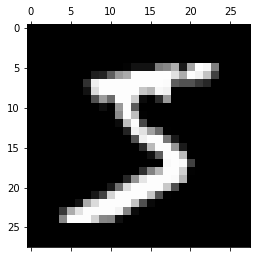

In [10]:
plt.matshow( train_images[ 0 ], cmap = 'gray' )
plt.show()

In [6]:
print( train_labels[ 5 ] )

2


We start with reshaping the data for the convnet.

notice we changed up the hyperparameters for this.
Rather than using reshape: ( 60000, 28 * 28 ).
We instead used: ( 60000, 28, 28, 1 ).

This is because we need this format to fit the input shape of the model.

Other than that we are still operating on the premise:

1. shaping the data for the model.
2. encoding the labels for both training and testing sets.
3. compiling and training the model with training data.
4. evaluating the model with the test data.

In [11]:
train_images = train_images.reshape( ( 60000, 28, 28, 1 ) )
train_images = train_images.astype( 'float32' ) / 255
test_images = test_images.reshape( ( 10000, 28, 28, 1 ) )
test_images = test_images.astype( 'float32' ) / 255
train_labels = to_categorical( train_labels )
test_labels = to_categorical( test_labels )
print( train_labels.shape )
print( train_labels[ 5 ] )

(60000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


This is the convolutional network. While you could use just the Dense layers to achieve digit identification. You could gain even more accuracy if you use convolutional network. So the idea is to use a filter that will create localized values which will piece together to identify digits.

So here we have a couple of functions from layers:

Conv2D is the convolutional layer.
Conv2D( filters, ( filter_height, filter_width ), ( activation ), ( input_shape ) )

The filter will move through the image pixel by pixel ( or "convolves") around the image picking up values.
This will create an output of: 26 x 26.

MaxPooling2D( height, width )
MaxPooling layer just takes the highest values from the Convolutional layer and puts it in height x width. 
It will use a filter of 2 x 2 moving around the 26 x 26 output with the purpose of taking the highest values from the 4 squares and create an output of 1 value each stride which because the filter is 2 x 2, the stride would also be 2. Note that MaxPooling will reduce the output to half.

The last layer: model.add( layers.Dense( 10. activation = 'softmax' )

So here we have 10 neurons which will associate, imagine digits between 0 and 9. Each neuron will contain values be between 0 - 1 and all of the values will sum to 1.

So basically we have a probability for a digit prediction. The highest probability will be the model's prediction for the digit.

In [12]:
model = models.Sequential()
model.add( layers.Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape=( 28, 28, 1 ) ) )
model.add( layers.MaxPooling2D( ( 2, 2 ) ) )
model.add( layers.Conv2D( 64, ( 3 ,3 ), activation = 'relu' ) )
model.add( layers.MaxPooling2D( ( 2, 2 ) ) )
model.add( layers.Conv2D( 64, ( 3, 3 ), activation = 'relu' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 64, activation = 'relu' ) )
model.add( layers.Dense( 10, activation = 'softmax' ) )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 4)         580       
_________________________________________________________________
flatten_1 (Flatten)          (None, 484)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4850      
Total params: 5,590
Trainable params: 5,590
Non-trainable params: 0
_________________________________________________________________


compiling and training the model

The model will be trained with the fit function.

RMSprop is root mean square propagation.

categorical crossentropy for multi class classification.

We load in the training images, training labels with 5 epochs. Normally batch size default is 32, here we are using 64.

In [13]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
model.fit( train_images, train_labels, epochs = 5, batch_size = 64 )

Epoch 1/4
60000/60000 [==============================] - 33s 555us/step - loss: 0.3788 - acc: 0.8892
Epoch 2/4
60000/60000 [==============================] - 36s 598us/step - loss: 0.1439 - acc: 0.9580
Epoch 3/4
60000/60000 [==============================] - 38s 638us/step - loss: 0.1090 - acc: 0.9682
Epoch 4/4
60000/60000 [==============================] - 41s 681us/step - loss: 0.0934 - acc: 0.9726


In [14]:
#evaluating the model with the test data now
test_loss, test_acc = model.evaluate( test_images, test_labels )
print( 'test_acc:', test_acc )

10000/10000 [==============================] - 2s 243us/step
test_acc: 0.9763


We are visualzing the data for the test images. 

The test_images paramaters are different because we are calling a reshaped test_images, so the parameters have to match accordingly.

Notice the test_labels is also reshaped. Rather than seeing a value of 0, we get an array of 10 in binary form.

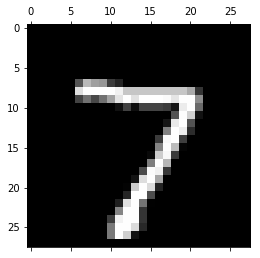

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
plt.matshow( test_images[ 0, :, :, 0 ], cmap = 'gray' )
plt.show()
print( test_labels[ 0 ] )

Visualizing the predictions predictions on the unseen data
This is going to show us how the model is predicting the images.

The output is an array of values where each value is associated to a digit.

If we summed up all the neurons we would get a sum of 1.

In [16]:
predictions = model.predict( test_images )
print( predictions[ 0 ] )

[9.3754508e-08 2.1981594e-09 3.6539913e-07 1.4834933e-05 8.7365132e-12
 3.8641147e-08 2.9599114e-16 9.9998152e-01 5.8638523e-08 3.0531103e-06]


After rounding we can see the output of the prediction. Here we see how the model predicts which digit which is in binary format of array 0 - 9. 

In [18]:
print( predictions[ 0 ].round() )

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
